# Parametric model of plate with multiple holes

### Objective:
In this example we'll setup a parametric model in PyMAPDL for a rectangular plate with multiple holes. The model is setup such that one can change the dimensions of the plate, the number of holes and their radius, the material properties and the pressure applied.

The learning objectives of this demo are:
* Launch PyMAPDL on a local machine
* Setup and solve a parametric model using PyMAPDL
* Interactive plotting of CAD, mesh, and results in Pythonic interface.

### Model Details
<div>
    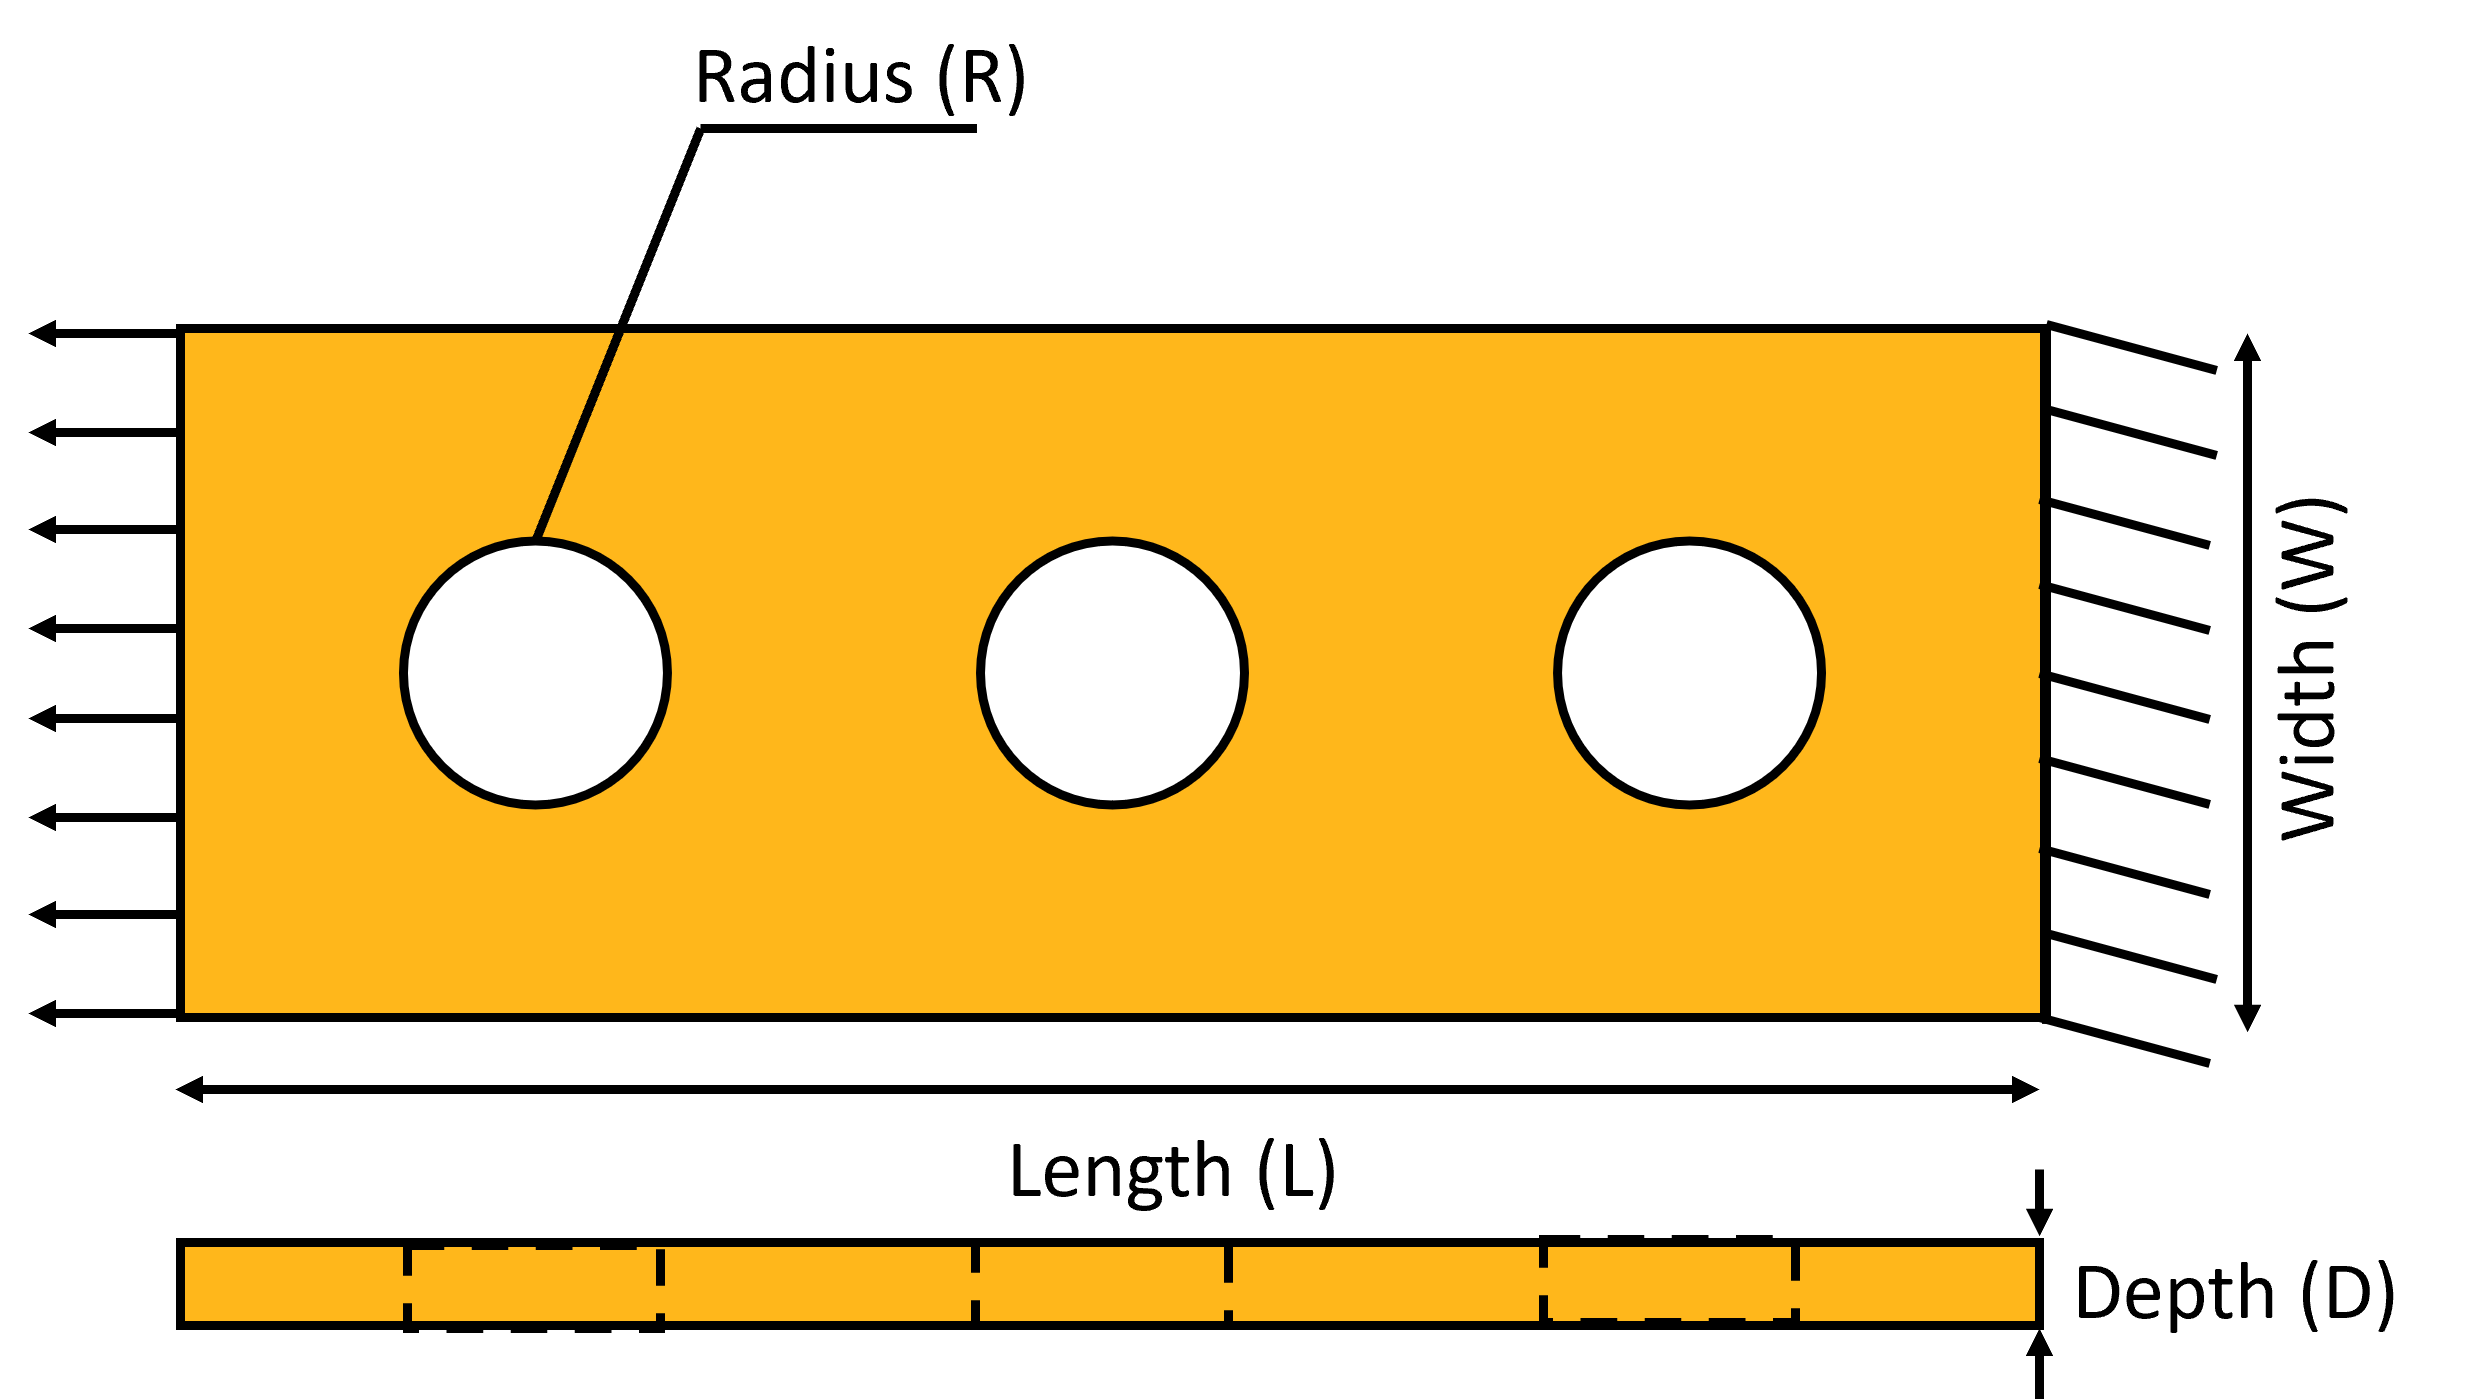
</div>

#### Model parameters:
* Length, width and depth of the plate
* Number of holes
* Raidus of the holes
* Material properties (Young's modulus and Poisson's ratio)
* Applied pressure

## Step 1 - define all parameters

In [1]:
# All units in (m, Kg, s)
LENGTH = 2
WIDTH = 2
DEPTH = 0.01


E = 1.086e8
NU = 0.36

DISPL = 1e-3

# Step 2 - launch MAPDL and create geometry

C:\Users\Jacky Li\.conda\envs\LTL\lib\site-packages\pyvista\core\dataset.py:1335: PyvistaDeprecationWarning: Use of `cell_arrays` is deprecated. Use `cell_data` instead.
  PyvistaDeprecationWarning
C:\Users\Jacky Li\.conda\envs\LTL\lib\site-packages\pyvista\jupyter\notebook.py:60: UserWarning: Failed to use notebook backend: 

Please install `ipyvtklink` to use this feature: https://github.com/Kitware/ipyvtklink

Falling back to a static output.
  warnings.warn(f'Failed to use notebook backend: \n\n{e}\n\n'


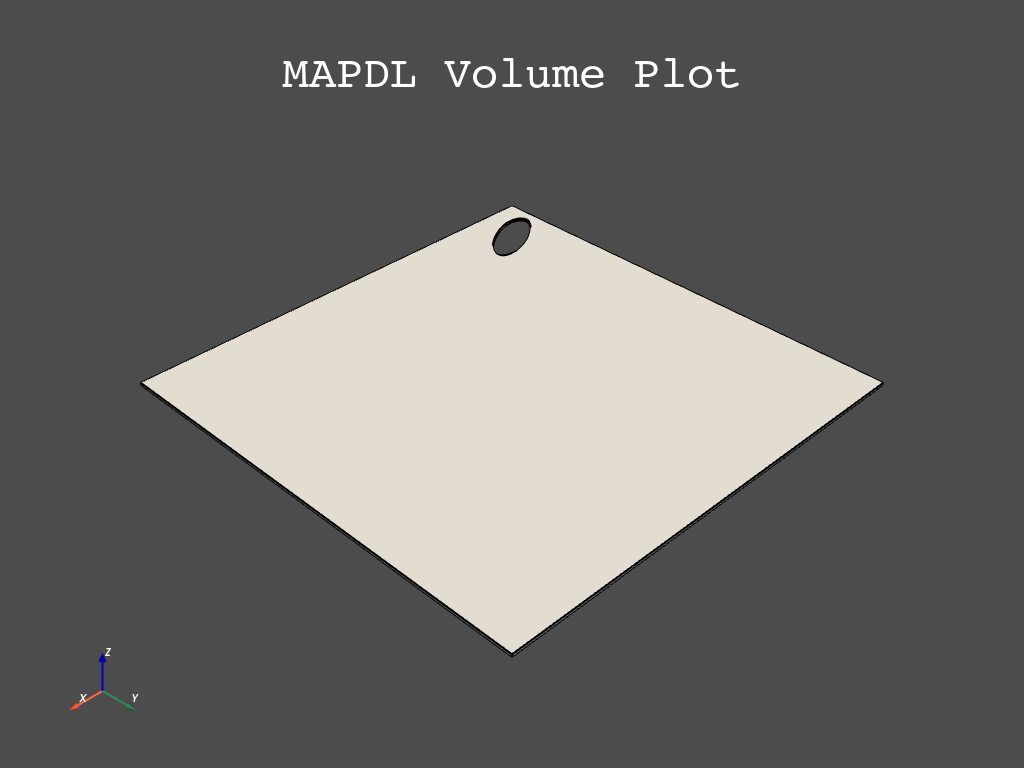

[(4.154720255196002, 4.154720255196002, 3.1597202551960013),
 (1.0, 1.0, 0.005000000000000002),
 (0.0, 0.0, 1.0)]

In [2]:
from ansys.mapdl.core import launch_mapdl
exec_loc = 'C:/Program Files/ANSYS Inc/ANSYS Student/v222/ANSYS/bin/winx64/ANSYS222.exe'
mapdl = launch_mapdl(exec_loc)
import numpy as np

mapdl.clear()
mapdl.prep7()
mapdl.block(0, LENGTH, 0, WIDTH, 0, DEPTH)
k1 = mapdl.cyl4(0.2,0.2,0.18,'','','',DEPTH)
mapdl.clocal(20, 0, 0.2, 0.2, 0, 30)
k2 = mapdl.vlscale(k1,'','', 1,0.4,'','','',1)
mapdl.csys(0)

mapdl.vsbv(1,'all')
mapdl.vplot('all')

## Step 3 - define material properties, mesh attributes and generate mesh.

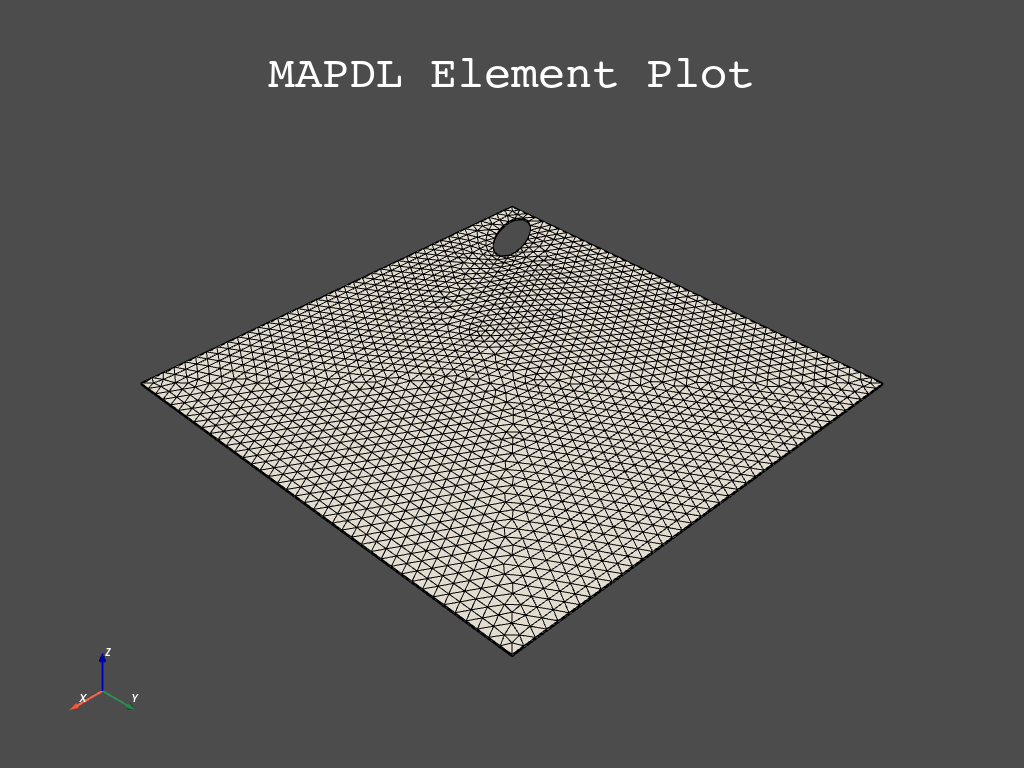

[(4.154720255196002, 4.154720255196002, 3.1597202551960013),
 (1.0, 1.0, 0.005000000000000001),
 (0.0, 0.0, 1.0)]

In [3]:
mapdl.lesize("ALL", 0.05, layer1=1)

mapdl.mp('ex',1,E)
mapdl.mp('nuxy',1,NU)

mapdl.et(1,'SOLID186')
mapdl.mshape(1, "3D")
mapdl.mshkey(0)
mapdl.vmesh('all')
mapdl.eplot()

## Step 4 - apply loads and boundary conditions

In [4]:
mapdl.nsel('s','loc','x',0)
mapdl.d('all','all',0)

mapdl.nsel('s','loc','x', LENGTH)
mapdl.d('all','ux',DISPL)
#mapdl.sf('all','pres',PRESSURE)

mapdl.allsel()
mapdl.finish()

'***** ROUTINE COMPLETED *****  CP =        19.922'

## Step 4 - solve the static problem

In [5]:
mapdl.slashsolu()
output = mapdl.solve()

print(output)
mapdl.finish()

*** NOTE ***                            CP =      20.078   TIME= 14:50:15
 The automatic domain decomposition logic has selected the MESH domain   
 decomposition method with 2 processes per solution.                     

 *****  MAPDL SOLVE    COMMAND  *****

 *** NOTE ***                            CP =      20.078   TIME= 14:50:15
 There is no title defined for this analysis.                            

 *** WARNING ***                         CP =      20.125   TIME= 14:50:15
 Previous testing revealed that 22 of the 12373 selected elements        
 violate shape warning limits.  To review warning messages, please see   
 the output or error file, or issue the CHECK command.                   

 *** NOTE ***                            CP =      20.125   TIME= 14:50:15
 The model data was checked and warning messages were found.             
  Please review output or errors file (                                  
 C:\Users\JACKYL~1\AppData\Local\Temp\ansys_pgrraqfxvp\file0.err ) 

'FINISH SOLUTION PROCESSING\n\n\n ***** ROUTINE COMPLETED *****  CP =        22.734'

In [6]:
# enter the solver routine and solve 
#mapdl.slashsolu()
#output = mapdl.solve()

#print(output)

## Step 5 - plot the stress contours for the model

PyMAPDL Result
Units       : User Defined
Version     : 22.2
Cyclic      : False
Result Sets : 1
Nodes       : 24670
Elements    : 12373


Available Results:
EMS : Miscellaneous summable items (normally includes face pressures)
ENF : Nodal forces
ENS : Nodal stresses
ENG : Element energies and volume
EEL : Nodal elastic strains
ETH : Nodal thermal strains (includes swelling strains)
EUL : Element euler angles
EPT : Nodal temperatures
NSL : Nodal displacements
RF  : Nodal reaction forces

160311.60259537358


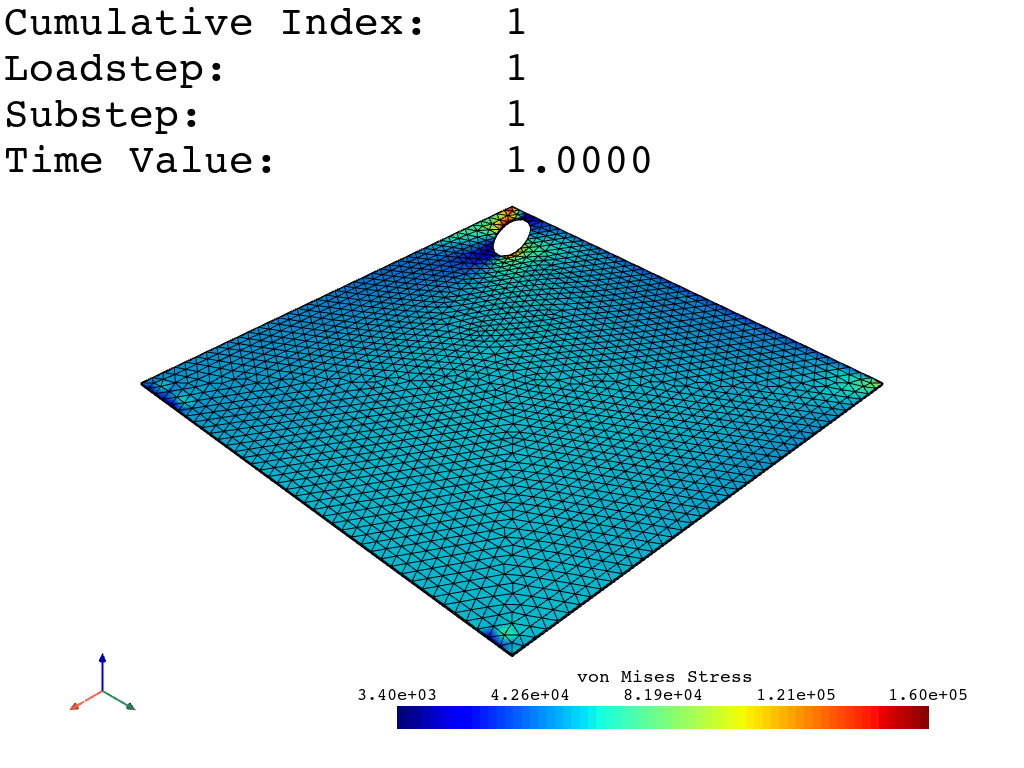

In [7]:
result = mapdl.result
print(result)

nnum, stress = result.principal_nodal_stress(0)
von_mises = stress[:, -1]
max_stress = np.nanmax(von_mises)
print(max_stress)

result.plot_principal_nodal_stress(0,'seqv',background='w',show_edges=True,text_color='k',add_text=True)

## Step 6 - exit MAPDL

In [8]:
#mapdl.post1()
print(mapdl.post1())
mapdl.nsel("S", "LOC", "X", 0)
mapdl.fsum()
reaction_1_bottom_X = mapdl.get("REAC_1", "FSUM", "", "ITEM", "FX")
reaction_2 = mapdl.get("REAC_2", "FSUM", "", "ITEM", "FY")
print(reaction_1_bottom_X)

mapdl.nsel("S", "LOC", "X", LENGTH)
mapdl.fsum()
reaction_2_top_X = mapdl.get("REAC_2", "FSUM", "", "ITEM", "FX")
print(reaction_2_top_X)
print(reaction_2)
stiffness = (abs(reaction_1_bottom_X)+abs(reaction_2_top_X))/2/abs(DISPL)
print(stiffness)

*** MAPDL - ENGINEERING ANALYSIS SYSTEM  RELEASE 2022 R2          22.2     ***
 Ansys Mechanical Enterprise Academic Student      
 00000000  VERSION=WINDOWS x64   14:50:18  NOV 15, 2022 CP=     22.844

                                                                               



          ***** MAPDL RESULTS INTERPRETATION (POST1) *****

 *** NOTE ***                            CP =      22.844   TIME= 14:50:18
 Reading results into the database (SET command) will update the current 
 displacement and force boundary conditions in the database with the     
 values from the results file for that load set.  Note that any          
 subsequent solutions will use these values unless action is taken to    
 either SAVE the current values or not overwrite them (/EXIT,NOSAVE).
0.0
0.0
0.0
0.0


In [15]:
print(mapdl.post1())
mapdl.nsel("s", "loc", "x",0)
mapdl.fsum()
reaction_1_bottom_X = mapdl.get("REAC_1", "FSUM", "", "ITEM", "fx")
reaction_2 = mapdl.get("REAC_2", "FSUM", "", "ITEM", "FY")
print(reaction_1_bottom_X)

MapdlExitedError: MAPDL has exited

In [13]:
mapdl.exit()